In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd

# Esercizio 1

$X\sim P(\lambda)$

Si, lambda può assumere un valore maggiore di uno dal momento che rappresenta il tasso di arrivo medio degli eventi- Non può assumere un valore negativo dal momento che il parametro perderebbe di significato!

$E(X)=Var(X)=\lambda$

$$p(x)=P(X+Y = x)$$
essendo una poissoniana, abbiamo la riproducibilità e dato che sono identicamente distribuite $\lambda1 = \lambda2$
$$ Z=X1+X2\sim P(2\lambda) $$
ora per trovare $P(Z=x)$ basta applicare la funzione di massa di probabilità:
$$ p_Z(x) = P(Z=x) = e^{-2\lambda}* \frac{2\lambda^x}{x!} $$

Fissiamo $\lambda = 0.9$

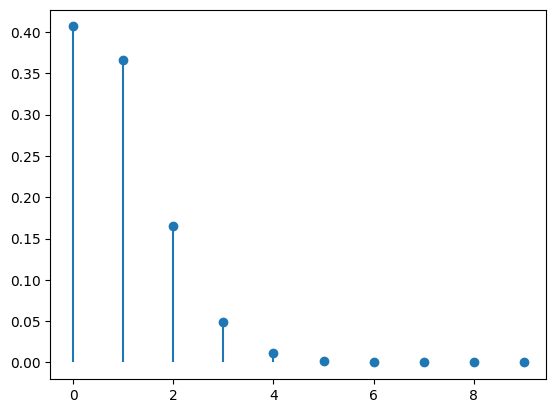

In [9]:
dist=st.poisson(0.9)
x=np.arange(0,10,1)
plt.vlines(x,0,dist.pmf(x))
plt.plot(x,dist.pmf(x),'o')
plt.show()

Il range scelto [0,10] per i valori da rappresentare nel grafico, è stato scelto per poter visualizzare al meglio la PMF della distribuzione

Date $n$ variabili aleatorie iid distribuite come $X$ allora $\sum_{x=1}^{n} X_i \sim N(n\mu,\sqrt{n}\sigma)$
Quindi può essere vista come una Normale oppure un'altra poissoniana di parametro $n\lambda$

# Esercizio 2

#### Punto 1

Fissiamo $n=3$ e consideriamo la $X$ descritta prima

Per verificare che lo stimatore $T=(X1+X2-X3)$ sia non deviato, dobbiamo verificare che $E(T)=\lambda$.\\
$$E(X1+X2-X3) = \lambda$$
$$E(X1)+E(X2)-E(X3) = \lambda$$
dato che sono Indipendenti ed IID:
$$E(X)+E(X)-E(X) = \lambda$$
$$E(X) = \lambda$$
$$\lambda = \lambda$$\
Lo stimatore risulta non deviato!\
Calcoliamo ora l'MSE:
$$ MSE $$

Per verificare che lo stimatore $U=\frac{1}{5}(2X1+2X2+X3)$ sia non deviato, dobbiamo verificare che $E(T)=\lambda$.\\
$$E(\frac{1}{5}(2X1+2X2+X3)) = \lambda$$
dato che sono Indipendenti ed IID:
$$E(\frac{1}{5}(5X)) = \lambda$$
$$E(X) = \lambda$$
$$\lambda = \lambda$$
Lo stimatore risulta non deviato!\
Calcoliamo ora l'MSE:
$$ MSE $$

#### Punto 2 - 3

Possiamo vedere $\overline{X}$ come una Normale: $\overline{X}\sim N(\frac{\lambda}{n}, \frac{\lambda}{n} )$

#### Punto 4

La media è sempre uno stimatore non deviato per il valore atteso e quindi il suo bias varrà per forza zero.\
Per quanto riguarda il suo MSE possiamo calcolarlo come:

$$ MSE$$

#### Punto 5

Non è deviata per la varianza banalmente perchè $Var(X)=E(X)=\lambda$. Se calcolassimo il bias otterremmo di conseguenza uno zero e potremmo dedurre che non ha deviazione.
Per quanto riguarda il suo MSE possiamo calcolarlo come:
$$ MSE$$

# Esercizio 3

In [5]:
df=pd.read_csv('rilevazioni.csv',sep=';')
df

,temperatura,blocchidanneggiati,raffreddamento
0,46.024489,0.0,1.0
1,83.225486,0.0,1.0
2,81.451565,0.0,NaN
3,54.427135,0.0,1.0
4,76.438674,0.0,1.0
...,...,...,...
1722,28.688900,5.0,0.0
1723,56.358840,5.0,0.0
1724,64.711851,6.0,0.0
1725,34.016859,6.0,0.0


#### Punto 1

In [6]:
len(df)

1727

In [7]:
len(df.dropna())

1722

In [8]:
df.isna().any()

temperatura           False
blocchidanneggiati    False
raffreddamento         True
dtype: bool

#### Punto 2

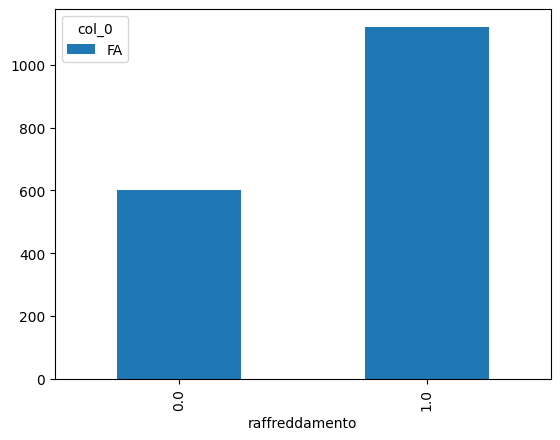

In [18]:
raff_abs=pd.crosstab(index=df['raffreddamento'], columns=['FA'])
raff_abs.plot.bar()
plt.show()

#### Punto 3

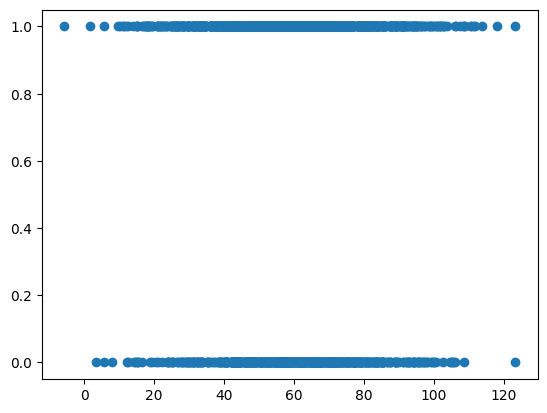

In [22]:
raffreddamento=df['raffreddamento']
temperatura=df['temperatura']
plt.scatter(temperatura,raffreddamento)
plt.show()

In [23]:
temperatura.corr(raffreddamento)

-0.04621947336116281

#### Punto 4

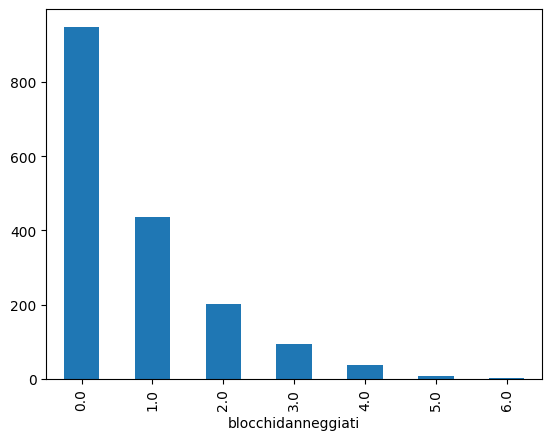

In [26]:
blocchidan=df['blocchidanneggiati']
blocchidan=blocchidan.value_counts()
blocchidan.plot.bar()
plt.show()

#### Punto 5

In [30]:
cong=pd.crosstab(index=df['blocchidanneggiati'],columns=df['raffreddamento'])
cong

raffreddamento,0.0,1.0
blocchidanneggiati,,
0.0,116,830
1.0,181,253
2.0,166,34
3.0,89,5
4.0,37,0
5.0,8,0
6.0,3,0


In [57]:
D = (181+253+166+34+89+5+37+8+3) / len(df['blocchidanneggiati'])
D

0.4493341053850608

In [56]:
intersezione = (253+34+5)/ len(df['blocchidanneggiati'])
intersezione

0.1690793283149971

In [55]:
R = len(df[df['raffreddamento']==1])/len(df['raffreddamento'])
R

0.6496815286624203

In [53]:
condizionata = intersezione/R
condizionata

0.26024955436720143

In [63]:
D2=1-D
intersezione2=(830)/ len(df['blocchidanneggiati'])
condizionata2=intersezione2/D2
condizionata2

0.8727655099894848

Non possono sommare ad uno poichè alcune probabilità rappresentano un valore già tenuto in considerazione da altre probabilità calcolate. Ad esempio, la probabilità di avere blocchi danneggiati (P(D)) e la probabilità di avere blocchi danneggiati ed un raffreddamento attivo sono due probabilità che rappresentano degli eventi intersecati tra loro.

#### Punto 4

In [80]:
import math
v=1.5/8.41
dist=st.norm(12.95,8.41)
dist.cdf(12.95+1.5) - dist.cdf(12.95-1.5)

0.14155902940121173